# Popular Names Analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
filename=r"D:\datasets\Popular_Baby_Names.csv"

In [3]:
df=pd.read_csv(filename)
df

,Year of Birth,Gender,Ethnicity,Child's First Name,Count,Rank
0,2011,FEMALE,HISPANIC,GERALDINE,13,75
1,2011,FEMALE,HISPANIC,GIA,21,67
2,2011,FEMALE,HISPANIC,GIANNA,49,42
3,2011,FEMALE,HISPANIC,GISELLE,38,51
4,2011,FEMALE,HISPANIC,GRACE,36,53
...,...,...,...,...,...,...
57577,2014,MALE,WHITE NON HISPANIC,Yousef,18,94
57578,2014,MALE,WHITE NON HISPANIC,Youssef,24,88
57579,2014,MALE,WHITE NON HISPANIC,Yusuf,16,96
57580,2014,MALE,WHITE NON HISPANIC,Zachary,90,39


In [4]:
df.shape

(57582, 6)

In [5]:
df.columns

Index(['Year of Birth', 'Gender', 'Ethnicity', 'Child's First Name', 'Count',
       'Rank'],
      dtype='object')

In [6]:
df.describe()

,Year of Birth,Count,Rank
count,57582.000000,57582.000000,57582.000000
mean,2013.283352,33.929596,57.066114
std,2.056076,39.027451,25.519447
min,2011.000000,10.000000,1.000000
25%,2012.000000,13.000000,38.000000
50%,2013.000000,20.000000,59.000000
75%,2014.000000,36.000000,78.000000
max,2019.000000,426.000000,102.000000


In [7]:
df.isnull().sum()

Year of Birth         0
Gender                0
Ethnicity             0
Child's First Name    0
Count                 0
Rank                  0
dtype: int64

In [8]:
df.isna().sum()

Year of Birth         0
Gender                0
Ethnicity             0
Child's First Name    0
Count                 0
Rank                  0
dtype: int64

In [54]:
len(df["Child's First Name"].unique())

3211

In [55]:
#Change some names to have proper case
df["Child's First Name"] = df["Child's First Name"].str.title()

In [37]:
df.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
57577     True
57578     True
57579     True
57580     True
57581     True
Length: 57582, dtype: bool

In [40]:
df.drop_duplicates(inplace=True)

In [9]:
df['Year of Birth'].unique()

array([2011, 2013, 2012, 2014, 2017, 2018, 2016, 2015, 2019], dtype=int64)

Data is from 2011 to 2019

In [10]:
df['Ethnicity'].unique()

array(['HISPANIC', 'WHITE NON HISPANIC', 'ASIAN AND PACIFIC ISLANDER',
       'BLACK NON HISPANIC', 'ASIAN AND PACI', 'BLACK NON HISP',
       'WHITE NON HISP'], dtype=object)

In [11]:
replace={'WHITE NON HISP' : 'WHITE NON HISPANIC',
         'ASIAN AND PACI': 'ASIAN AND PACIFIC ISLANDER',
         'BLACK NON HISP': 'BLACK NON HISPANIC'
        }
#replace other value to align
df['Ethnicity']=df['Ethnicity'].replace(replace)


In [12]:
df['Ethnicity'].unique()

array(['HISPANIC', 'WHITE NON HISPANIC', 'ASIAN AND PACIFIC ISLANDER',
       'BLACK NON HISPANIC'], dtype=object)

In [13]:
df["Child's First Name"].unique()

array(['GERALDINE', 'GIA', 'GIANNA', ..., 'Emmanuella', 'Zaria', 'Demi'],
      dtype=object)

# EDA

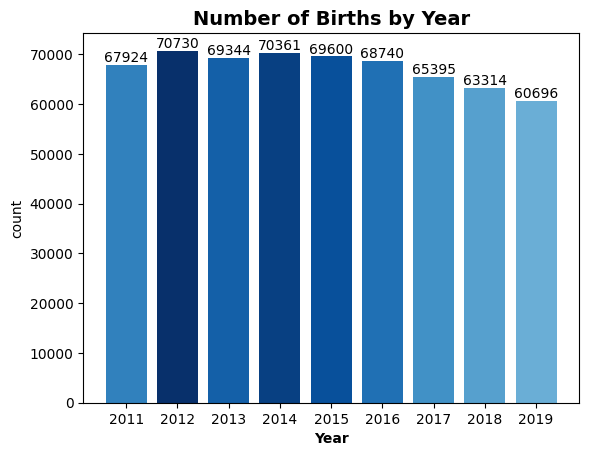

In [153]:
#group the data by year of birth then sum all the data by count
birth_count= df.groupby(['Year of Birth'])['Count'].sum().sort_values(ascending=False)

fig, ax = plt.subplots()

colors=plt.get_cmap('Blues')(np.linspace(1,0.5,len(birth_count)))

ax = plt.bar(birth_count.index, birth_count, color=colors)

plt.bar_label(ax)

plt.title("Number of Births by Year", fontweight='bold', fontsize=14)
plt.xticks(birth_count.index)

plt.ylabel("count")
plt.xlabel("Year", fontweight='bold')
plt.show()

**2012** had the most birth with 12090 births and **2019** have the least birth with 1935.

In [100]:
gen_eth=df.groupby(['Gender','Ethnicity'])['Gender'].count()

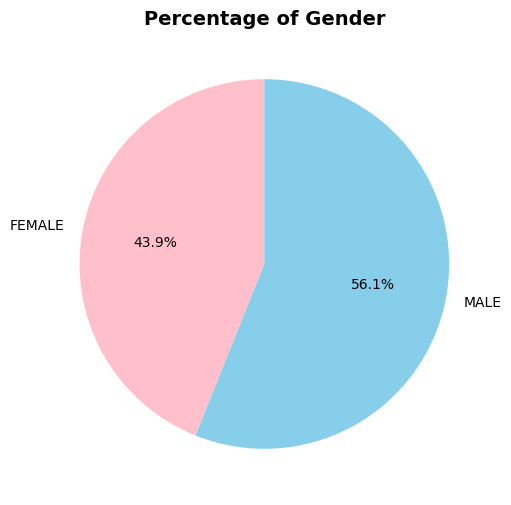

In [158]:
gender=df.groupby('Gender')['Count'].sum()

fig = plt.figure(figsize=(10,6))
colors=['pink', 'skyblue']

outside_circle=plt.pie(gender, autopct='%1.1f%%', labels=gender.index, colors=colors, startangle=90)

plt.title("Percentage of Gender", fontweight='bold', fontsize=14 )

plt.show()

Most of the births are Males.

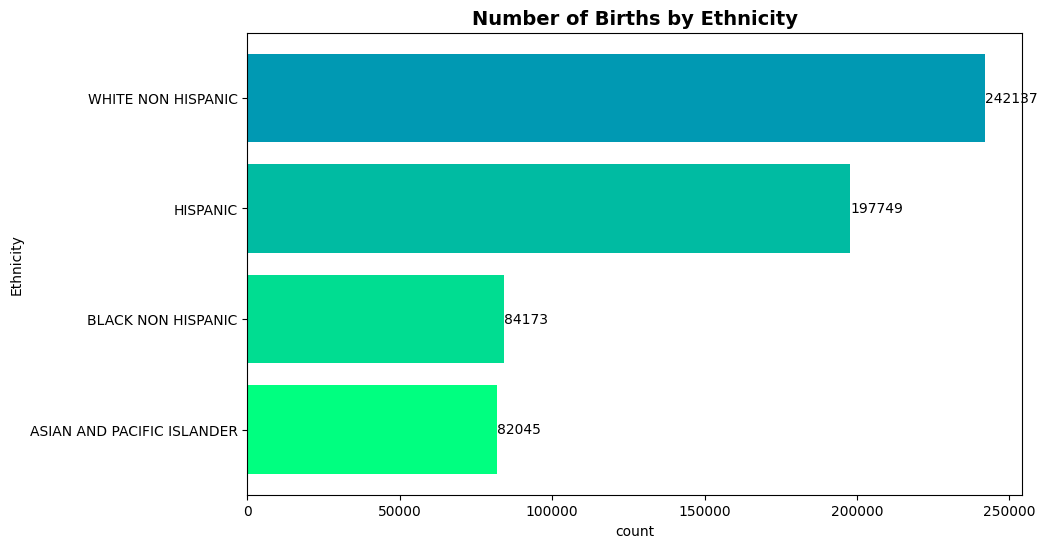

In [157]:
eth_count=df.groupby(['Ethnicity'])['Count'].sum()

fig, ax = plt.subplots(figsize=(10,6))
colors=plt.get_cmap("winter")(np.linspace(1,0.6,len(eth_count)))

ax = plt.barh(eth_count.index, eth_count, color=colors)

plt.bar_label(ax)

plt.title("Number of Births by Ethnicity", fontweight='bold', fontsize=14)
          
plt.ylabel("Ethnicity", fontsize=10)
plt.xlabel("count")
plt.show()

**White Non-Hispanics** have the most births from 2011 to 2019.

In [159]:
gen_grouped=df.groupby(['Gender', 'Ethnicity'])['Count'].sum()

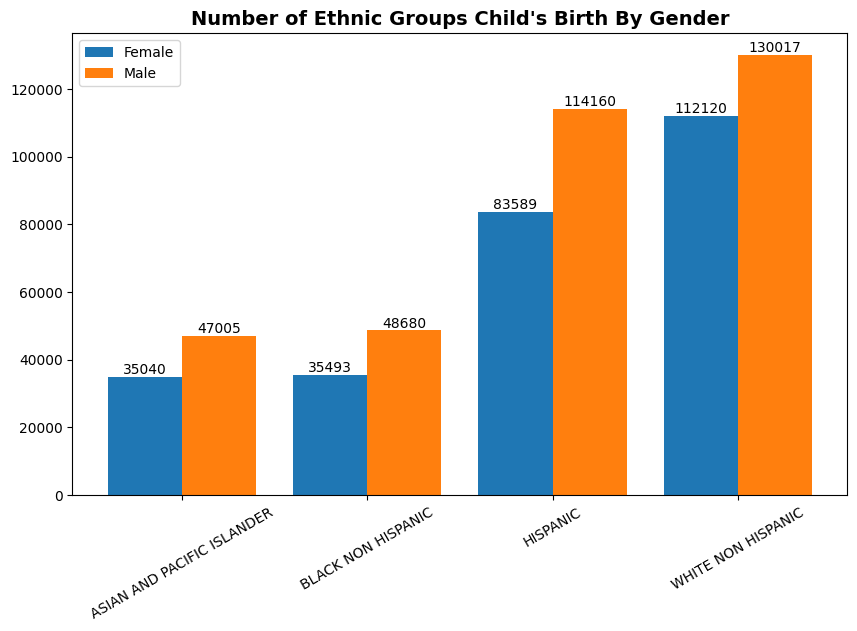

In [160]:
x_axis= np.arange(len(gen_grouped["FEMALE"]))

fig, ax = plt.subplots(figsize=(10,6))
ax1 = plt.bar(x_axis-0.2, gen_grouped["FEMALE"], 0.4, label='Female')
ax2 = plt.bar(x_axis+0.2, gen_grouped["MALE"], 0.4, label='Male')

plt.bar_label(ax1)
plt.bar_label(ax2)

plt.xticks(x_axis, gen_grouped["FEMALE"].index)
plt.tick_params(axis='x', labelrotation=30)

plt.title("Number of Ethnic Groups Child's Birth By Gender", fontweight='bold', fontsize=14)
plt.legend(loc='upper left')
plt.show()

Male are more frequent to be birthed in all ethnic groups.

In [ ]:
df.sort_values(by='Rank')

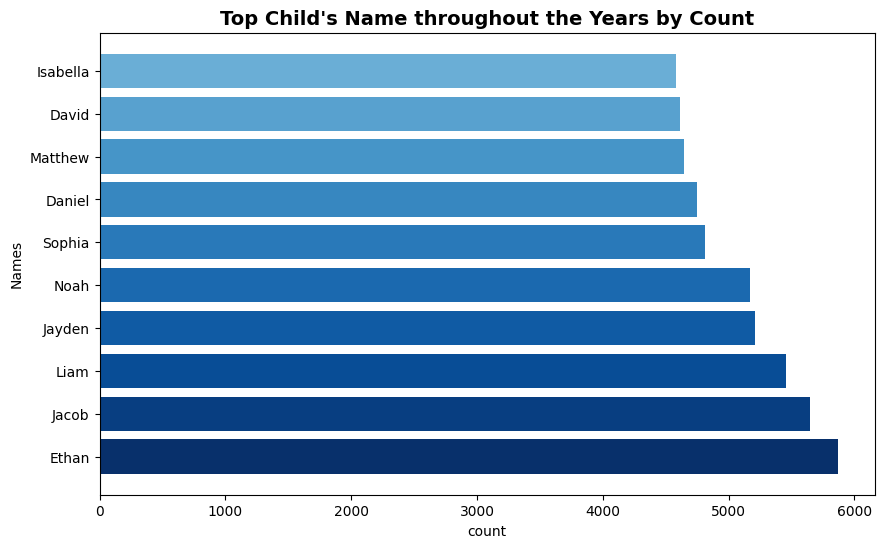

In [75]:
top_name=df.groupby(["Child's First Name"])['Count'].sum().sort_values(ascending=False).head(10)

fig, ax = plt.subplots(figsize=(10,6))

colors=plt.get_cmap("Blues")(np.linspace(1,0.5,len(top_name)))
plt.barh(top_name.index, top_name, color=colors)

plt.title("Top Child's Name throughout the Years by Count", fontweight='bold', fontsize=14)

plt.xlabel("count")
plt.ylabel("Names")
plt.show()

**Ethan** is the most popular name.

In [194]:
year_grouped=pd.DataFrame(df.groupby(['Year of Birth']).sum())
year_grouped.sort_values('Count', ascending=False)

,Count,Rank
Year of Birth,,
2012,70730,115107
2014,70361,119355
2015,69600,116315
2013,69344,117003
2016,68740,117190
2011,67924,110898
2017,65395,107381
2018,63314,109095
2019,60696,103574


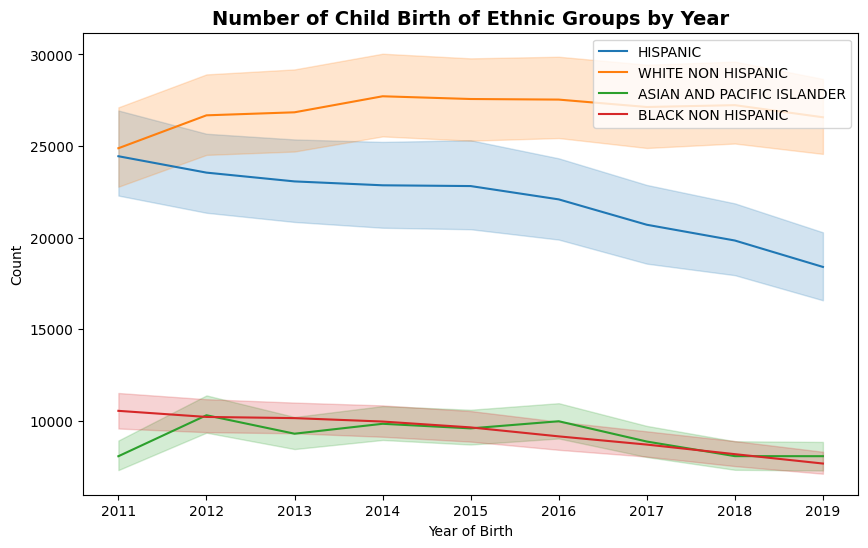

In [214]:
eth_grouped=df.groupby(['Year of Birth', 'Ethnicity'])['Count'].sum()
eth_grouped

plt.figure(figsize=(10,6))
ax=sns.lineplot(data=df, x='Year of Birth', y='Count', hue='Ethnicity', estimator='sum')

plt.title("Number of Child Birth of Ethnic Groups by Year", fontweight='bold', fontsize=14)
plt.legend(loc="upper right")
plt.show()

White Non Hispanics have steady Child Birth throughout the years while Hispanics and Black Non Hispanic is decreasing.

In [59]:
df

,Year of Birth,Gender,Ethnicity,Child's First Name,Count,Rank
0,2011,FEMALE,HISPANIC,Geraldine,13,75
1,2011,FEMALE,HISPANIC,Gia,21,67
2,2011,FEMALE,HISPANIC,Gianna,49,42
3,2011,FEMALE,HISPANIC,Giselle,38,51
4,2011,FEMALE,HISPANIC,Grace,36,53
...,...,...,...,...,...,...
49507,2018,FEMALE,BLACK NON HISPANIC,Nala,10,40
49508,2018,FEMALE,BLACK NON HISPANIC,Royalty,10,40
49509,2018,FEMALE,BLACK NON HISPANIC,Sariyah,10,40
49510,2018,FEMALE,BLACK NON HISPANIC,Simone,10,40
